In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [148]:
csv_file = "^NSEI.csv"

In [149]:
df=pd.read_csv(csv_file)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,02-01-2019,10868.84961,10895.34961,10735.04981,10792.50000,10792.50000,309700.0
1,03-01-2019,10796.79981,10814.04981,10661.25000,10672.25000,10672.25000,286200.0
2,04-01-2019,10699.70020,10741.04981,10628.65039,10727.34961,10727.34961,296600.0
3,07-01-2019,10804.84961,10835.95020,10750.15039,10771.79981,10771.79981,269400.0
4,08-01-2019,10786.25000,10818.45020,10733.25000,10802.15039,10802.15039,277700.0


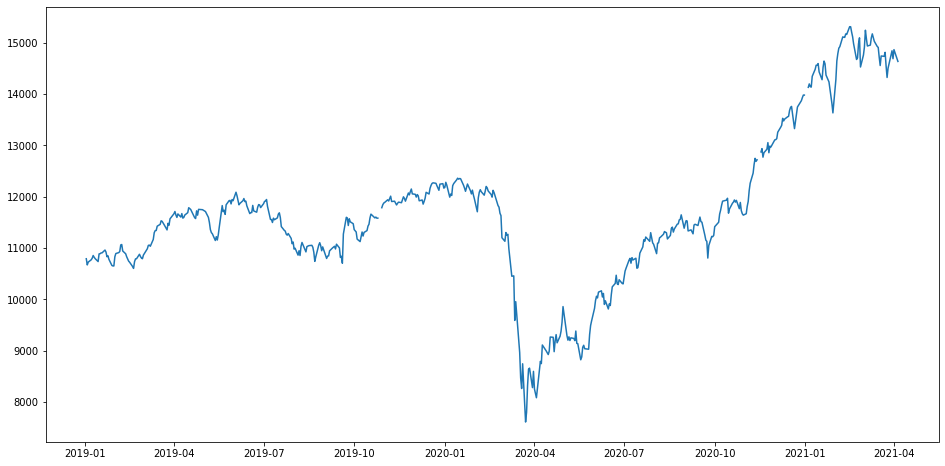

In [150]:
df["Date"]=pd.to_datetime(df.Date,format="%d-%m-%Y")
df.index=df['Date']
plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

In [151]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]

In [152]:
from datetime import datetime
a = datetime.now()
final_dataset=new_dataset.values
final_dataset_new = np.empty(np.shape(final_dataset))
print (np.shape(final_dataset))
print (final_dataset[1][0])
print (final_dataset[1][1])
for i in range (0, len(final_dataset)):
  number = int(final_dataset[1][0].strftime('%Y%m%d'))
  final_dataset_new[i][0] = number
  final_dataset_new[i][1] = final_dataset[i][1]
print(final_dataset_new)

(556, 2)
2019-01-03 00:00:00
10672.25
[[2.01901030e+07 1.07925000e+04]
 [2.01901030e+07 1.06722500e+04]
 [2.01901030e+07 1.07273496e+04]
 ...
 [2.01901030e+07 1.46907002e+04]
 [2.01901030e+07 1.48673496e+04]
 [2.01901030e+07 1.46377998e+04]]


In [153]:
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset=new_dataset.values
train_n = int(final_dataset.shape[0]*0.8)
train_data=final_dataset[0:train_n,:]
valid_data=final_dataset[train_n:,:]
new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset_new)
x_train_data,y_train_data=[],[]
for i in range(20,len(train_data)):
    x_train_data.append(scaled_data[i-20:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [154]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
print(x_train_data.shape)
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
inputs_data=new_dataset[len(new_dataset)-len(valid_data)-20:].values
inputs_data=inputs_data.reshape(-1,1)
print(inputs_data.shape)
inputs_data=scaler.fit_transform(inputs_data)
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

(424, 20, 1)
(132, 1)
Epoch 1/1
 - 58s - loss: 0.0000e+00


In [155]:
X_test=[]
for i in range(20,inputs_data.shape[0]):
    X_test.append(inputs_data[i-20:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

In [156]:
lstm_model.save("saved_model.h5")


In [157]:
new_dataset.head

<bound method NDFrame.head of               Close
Date               
2019-01-02  10792.5
2019-01-03  10672.2
2019-01-04  10727.3
2019-01-07  10771.8
2019-01-08  10802.2
...             ...
2021-03-26  14507.3
2021-03-30  14845.1
2021-03-31  14690.7
2021-04-01  14867.3
2021-04-05  14637.8

[556 rows x 1 columns]>

In [158]:
predicted_closing_price

array([[10906.923 ],
       [10908.781 ],
       [10910.499 ],
       [10911.123 ],
       [10911.612 ],
       [10911.164 ],
       [10909.759 ],
       [10907.631 ],
       [10905.316 ],
       [10903.844 ],
       [10903.606 ],
       [10905.386 ],
       [10909.215 ],
       [10915.236 ],
       [10923.252 ],
       [10932.724 ],
       [10942.31  ],
       [10951.447 ],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [11051.453 ],
       [11055.755 ],
       [11060.166 ],
       [11064.537 ],
       [11066.702 ],
       [11067.676 ],
       [11068.464 ],
       [11069.868 ],
       [11072.231 ],
       [11075

ipykernel_launcher:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


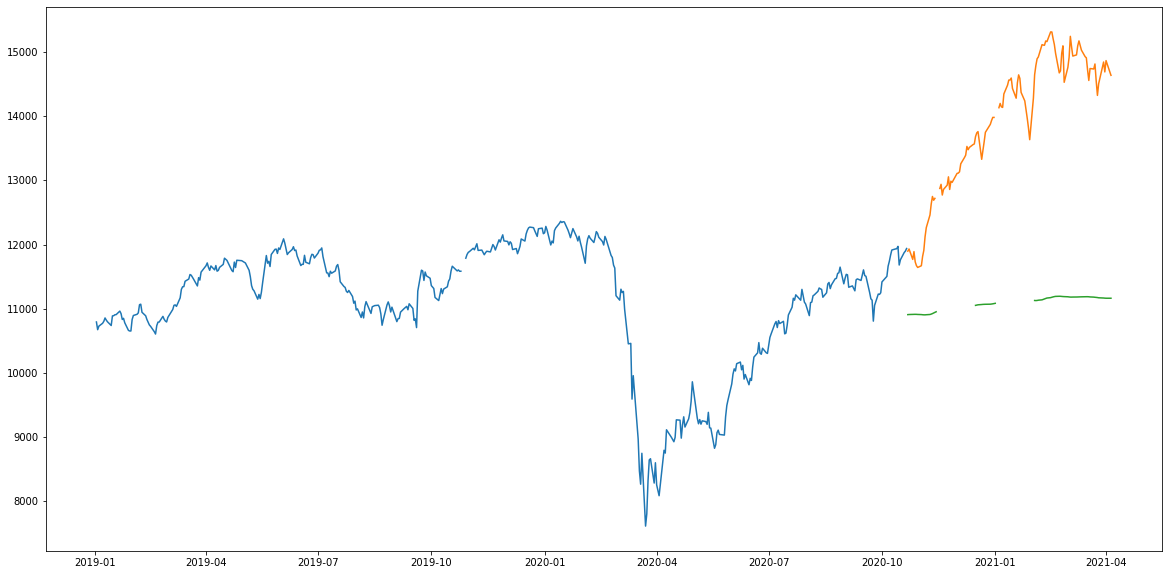

In [159]:

train_data=new_dataset[:train_n]
valid_data=new_dataset[train_n:]
valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])